In [1]:
# Packages for analysis

import pandas as pd
import numpy as np
from sklearn import svm

# Packages for visuals
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)

# Allows charts to appear in the notebook
%matplotlib inline

# Pickle package
import pickle

In [2]:
# Read in muffin and cupcake ingredient data
recipes = pd.read_csv('recipes_muffins_cupcakes.csv')
# recipes= pd.read_csv('recipes_new_sv.csv')
recipes

,Type,Flour,Milk,Sugar,Butter,Egg,Baking Powder,Vanilla,Salt
0,Muffin,55,28,3,7,5,2,0,0
1,Muffin,47,24,12,6,9,1,0,0
2,Muffin,47,23,18,6,4,1,0,0
3,Muffin,45,11,17,17,8,1,0,0
4,Muffin,50,25,12,6,5,2,1,0
5,Muffin,55,27,3,7,5,2,1,0
6,Muffin,54,27,7,5,5,2,0,0
7,Muffin,47,26,10,10,4,1,0,0
8,Muffin,50,17,17,8,6,1,0,0
9,Muffin,50,17,17,11,4,1,0,0


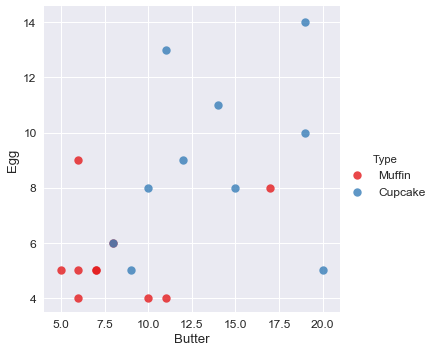

In [3]:
# Plot two ingredients
sns.lmplot('Butter', 'Egg', data=recipes, hue='Type',
           palette='Set1', fit_reg=False, scatter_kws={"s": 70});

In [4]:
# Specify inputs for the model
# ingredients = recipes[['Flour', 'Milk', 'Sugar', 'Butter', 'Egg', 'Baking Powder', 'Vanilla', 'Salt']].as_matrix()
ingredients = recipes[['Butter','Egg']].as_matrix()
print("ingredients: \n" + str(ingredients))
type_label = np.where(recipes['Type']=='Muffin', -1, 1)
print("labels: \n" + str(type_label))

# Feature names
recipe_features = recipes.columns.values[1:].tolist()
recipe_features

ingredients: 
[[ 7  5]
 [ 6  9]
 [ 6  4]
 [17  8]
 [ 6  5]
 [ 7  5]
 [ 5  5]
 [10  4]
 [ 8  6]
 [11  4]
 [19 14]
 [10  8]
 [20  5]
 [19 10]
 [15  8]
 [ 9  5]
 [14 11]
 [ 8  6]
 [12  9]
 [11 13]]
labels: 
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1]


['Flour', 'Milk', 'Sugar', 'Butter', 'Egg', 'Baking Powder', 'Vanilla', 'Salt']

In [5]:
# Fit the SVM model
model = svm.SVC(kernel='linear')
score = model.fit(ingredients, type_label)

In [6]:
# Get the separating hyperplane
A,B,C = model.coef_[0][0], model.coef_[0][1], model.intercept_[0]
print("w=[A,B]: ",A,B)
print("model intercept (C): " + str(C))

a = -A / B
ymin, ymax = 4, 14
xmin =(ymin + C/B) / (-A/B) #-C / A
xmax = (ymax + C/B) / (-A/B)

xx = [xmin, xmax]
yy = [ymin,ymax]

print("lambdas: " + str(model.dual_coef_))
print(model.support_vectors_)

# Plot the parallels to the separating hyperplane that pass through the support vectors
b = model.support_vectors_[-1]
xx_s_neg_min = (ymin - b[1] + a * b[0]) / a
xx_s_neg_max = (ymax - b[1] + a * b[0]) / a
xx_s_neg = [xx_s_neg_min, xx_s_neg_max] 

b = model.support_vectors_[-3]
xx_s_pos_min = (ymin - b[1] + a * b[0]) / a
xx_s_pos_max = (ymax - b[1] + a * b[0]) / a
xx_s_pos = [xx_s_pos_min, xx_s_pos_max] 


w=[A,B]:  0.166654455187 0.333308910374
model intercept (C): -3.99968250153
lambdas: [[-1.         -1.         -0.15277269 -1.         -1.          1.
   0.35763863  1.          1.          0.79513406]]
[[  6.   9.]
 [ 17.   8.]
 [ 10.   4.]
 [  8.   6.]
 [ 11.   4.]
 [ 10.   8.]
 [ 20.   5.]
 [  9.   5.]
 [  8.   6.]
 [ 12.   9.]]


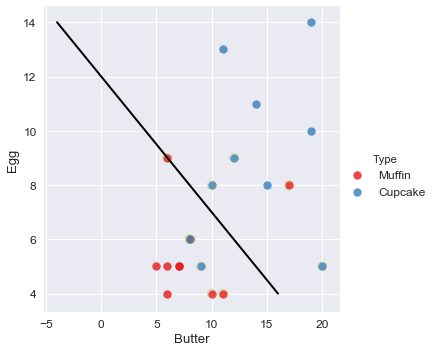

In [7]:
# Look at the margins and support vectors
sns.lmplot('Butter', 'Egg', data=recipes, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black')
# plt.plot(xx_s_neg, yy, 'k--')
# plt.plot(xx_s_pos, yy, 'k--')
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
            s=80, facecolors='none', color="y");


In [8]:
from sklearn.metrics import roc_curve, auc

fpr = [] #false positive rate, ergo 1 - specificity
tpr = [] #true positive rate, ergo sensitivity
print(score.decision_function(ingredients))
fpr, tpr, _ = roc_curve(type_label, score.decision_function(ingredients))
roc_auc = auc(fpr, tpr)

[ -1.16655676e+00   2.44229593e-05  -1.66652013e+00   1.49991452e+00
  -1.33321122e+00  -1.16655676e+00  -1.49986567e+00  -9.99902308e-01
  -6.66593398e-01  -8.33247853e-01   3.83307689e+00   3.33333333e-01
   9.99951154e-01   2.49984125e+00   1.16660561e+00  -8.33247853e-01
   1.99987789e+00  -6.66593398e-01   9.99951154e-01   2.16653234e+00]


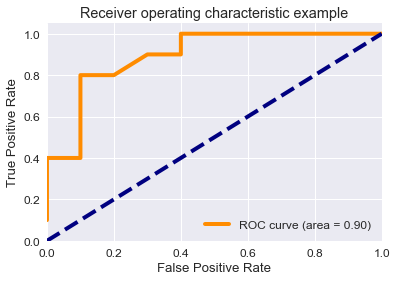

In [9]:
# plot ROC curve
plt.figure()
lw = 4 #line width
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()